[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andrychowanda/COMP6577/blob/master/COMP6577-7.ipynb)

Import required library

In [39]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

Prepare the data

In [40]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/master/iris.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
data = pd.read_csv("iris.csv")
X = data[["sepal.length", "sepal.width", "petal.length", "petal.width"]]

Training using KMeans

In [42]:
KMN = KMeans(n_clusters=3).fit(X)
KMNLabels = KMN.labels_
KMNClusterCenters = KMN.cluster_centers_
YPredict = KMN.predict(X)
print("KMN Labels : ", KMNLabels)
print("KMN Cluster Centre : ", KMNClusterCenters)
print("Y Predict : ", YPredict)

KMN Labels :  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
KMN Cluster Centre :  [[6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]]
Y Predict :  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


c:\Anaconda3\envs\deep_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Choosing the right number of K with Elbow Curve

c:\Anaconda3\envs\deep_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda3\envs\deep_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda3\envs\deep_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda3\envs\deep_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

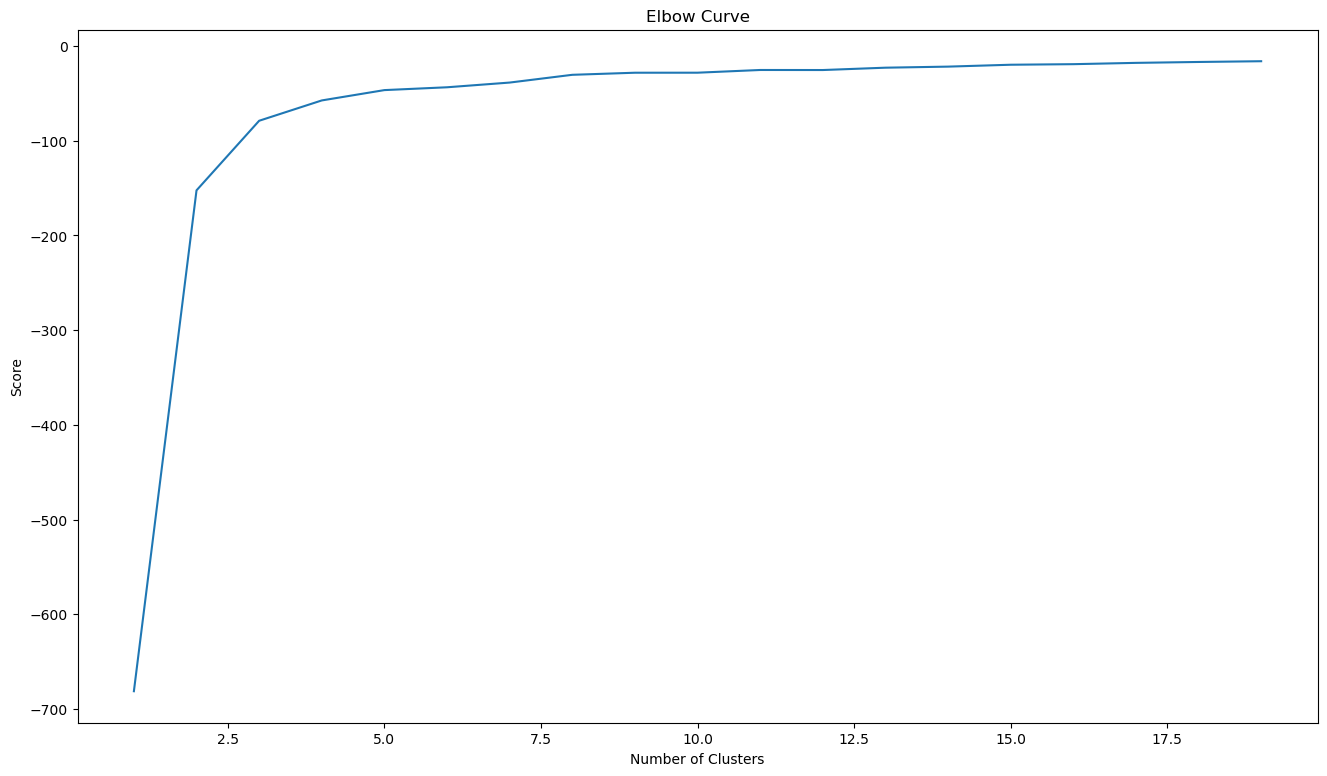

In [43]:
Ks = range(1, 20)
KMNs = [KMeans(n_clusters=i) for i in Ks]
score = [KMNs[i].fit(X).score(X) for i in range(len(KMNs))]
plt.plot(Ks, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Plot groups based on the features


c:\Anaconda3\envs\deep_learning\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Anaconda3\envs\deep_learning\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Anaconda3\envs\deep_learning\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Anaconda3\envs\deep_learning\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Anaconda3\envs\deep_learning\Lib\site-packages\seaborn\categorical.py:3399: 

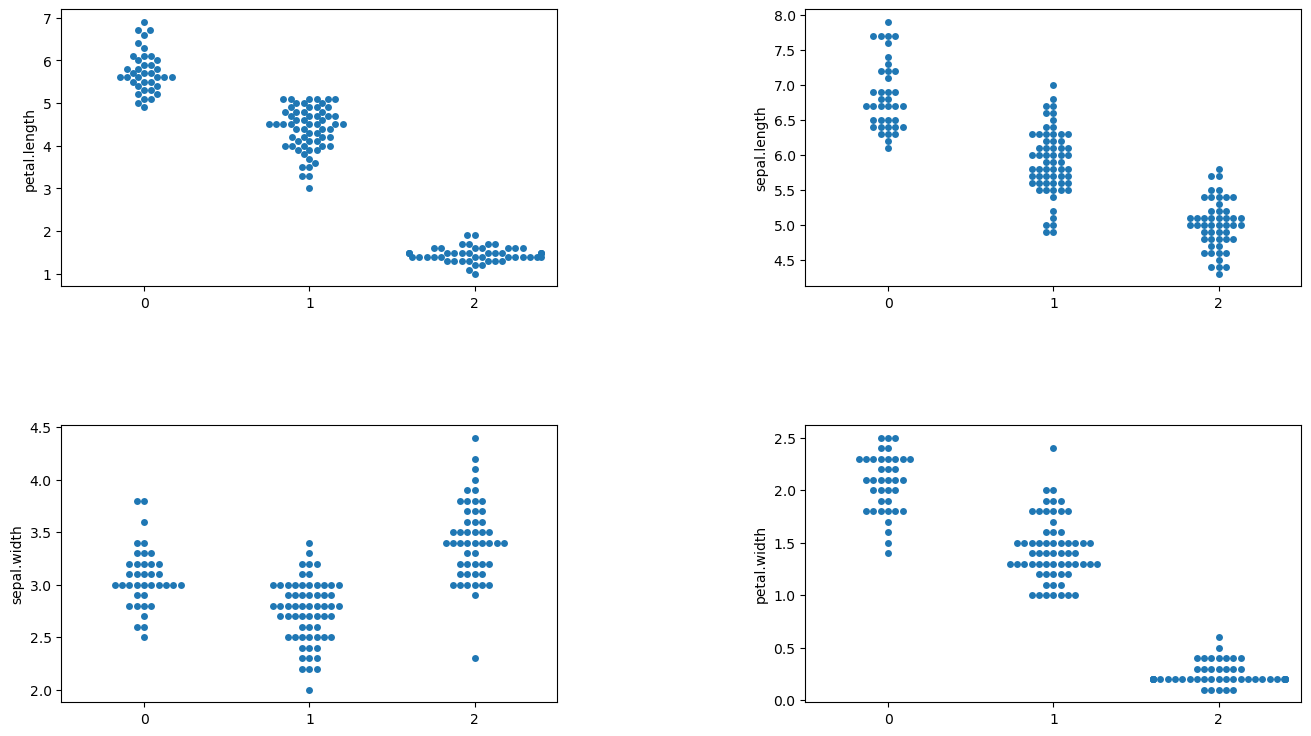

In [44]:
plt.subplot(221)
sb.swarmplot(x=KMNLabels, y=X["petal.length"])
plt.subplot(222)
sb.swarmplot(x=KMNLabels , y=X["sepal.length"])
plt.subplot(223)
sb.swarmplot(x=KMNLabels , y=X["sepal.width"])
plt.subplot(224)
sb.swarmplot(x=KMNLabels , y=X["petal.width"])
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise KMeans

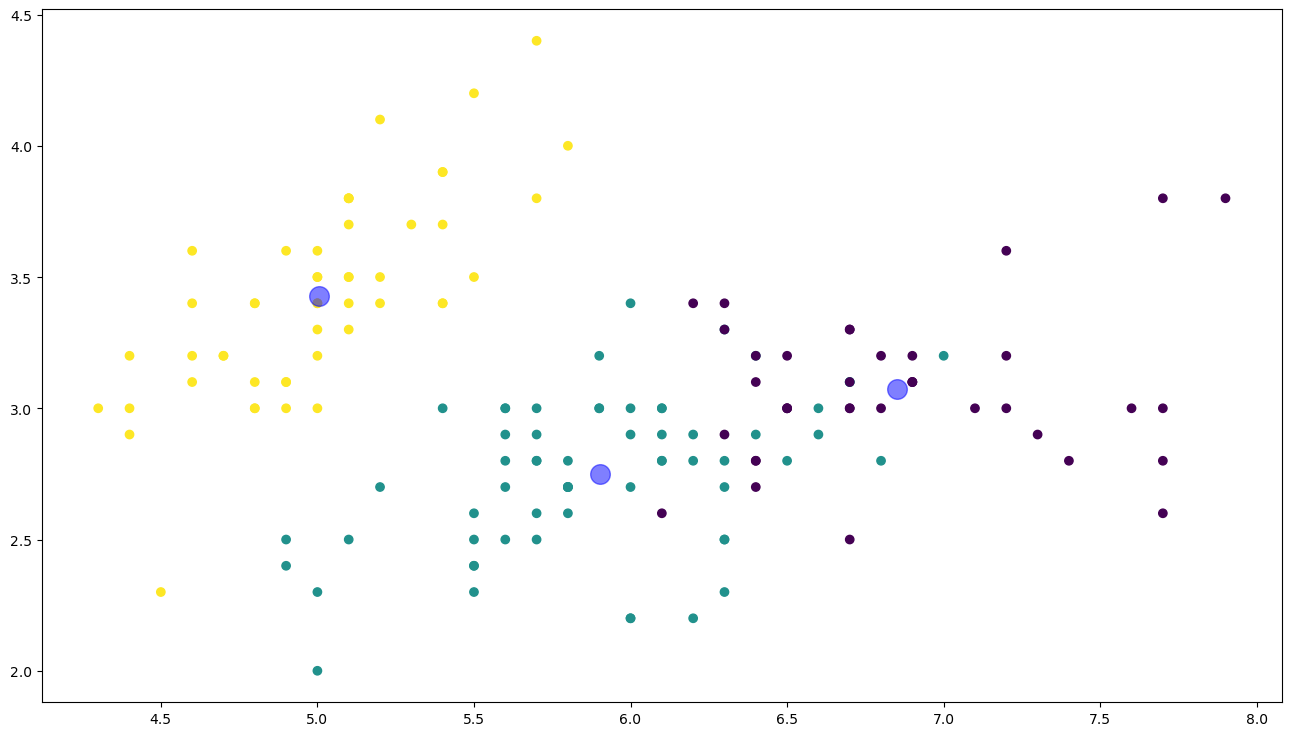

KMeans:  0.5528190123564102


In [45]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = YPredict)
plt.scatter(KMNClusterCenters[:, 0], KMNClusterCenters[:, 1], c = "b", s=200, alpha=0.5);
plt.show()
print("KMeans: ", silhouette_score(X, YPredict))

Training with DBSCAN

In [46]:
DBS = DBSCAN().fit(X)
YPredict = DBS.fit_predict(X)
DBSLabels = DBS.labels_
DBSCore = DBS.core_sample_indices_
print("DBS Labels : ", DBSLabels)
print("DBS Core Sample : ", DBSCore)
print("Y Predict : ", YPredict)

DBS Labels :  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
DBS Core Sample :  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  16  17  19  20
  21  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  58  61
  63  65  66  67  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  88  89  90  91  92  94  95  96  97  99 101 102 103 104
 110 111 112 115 116 120 121 123 124 125 126 127 128 132 133 136 137 138
 139 140 142 143 144 145 146 147 149]
Y Predict :  [ 0  0  0  0  0  0  

Plot groups based on the features

c:\Anaconda3\envs\deep_learning\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Anaconda3\envs\deep_learning\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Anaconda3\envs\deep_learning\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Anaconda3\envs\deep_learning\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Anaconda3\envs\deep_learning\Lib\site-packages\seaborn\categorical.py:3399: 

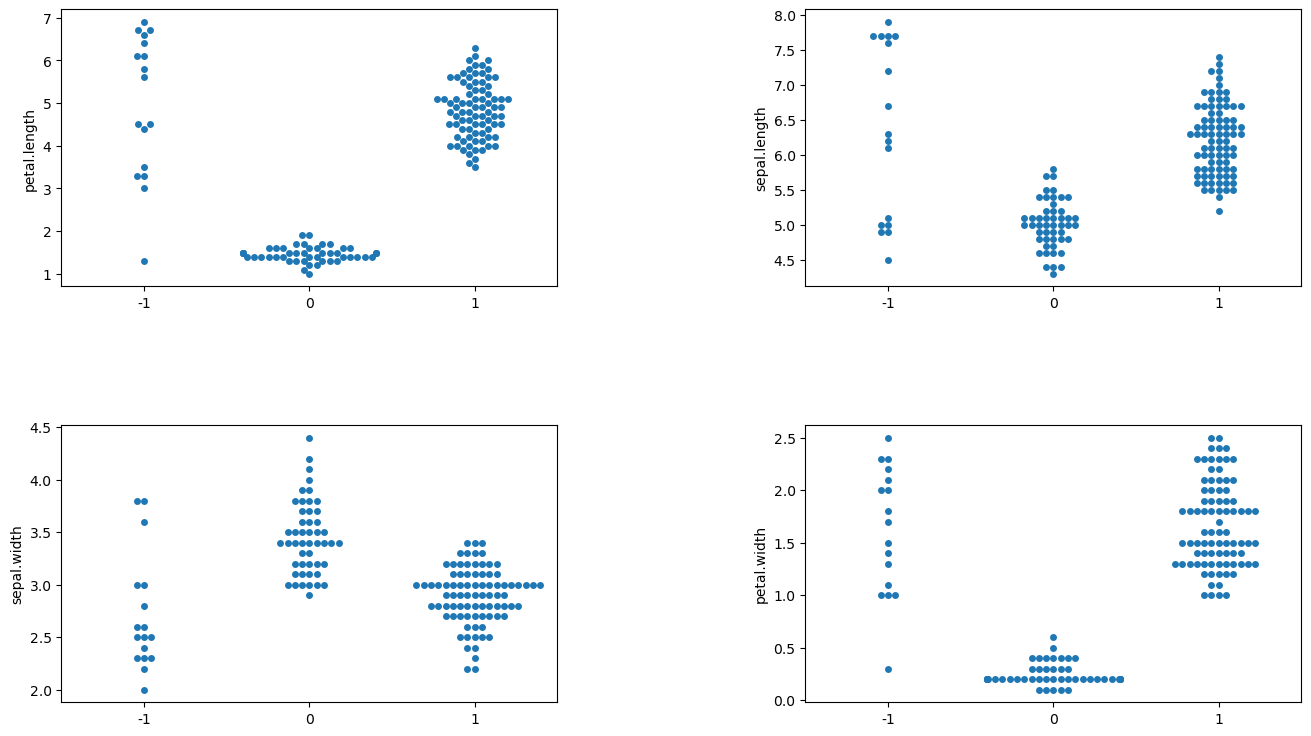

In [47]:
plt.subplot(221)
sb.swarmplot(x=DBSLabels , y=X["petal.length"])
plt.subplot(222)
sb.swarmplot(x=DBSLabels , y=X["sepal.length"])
plt.subplot(223)
sb.swarmplot(x=DBSLabels , y=X["sepal.width"])
plt.subplot(224)
sb.swarmplot(x=DBSLabels , y=X["petal.width"])
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise DBSCAN

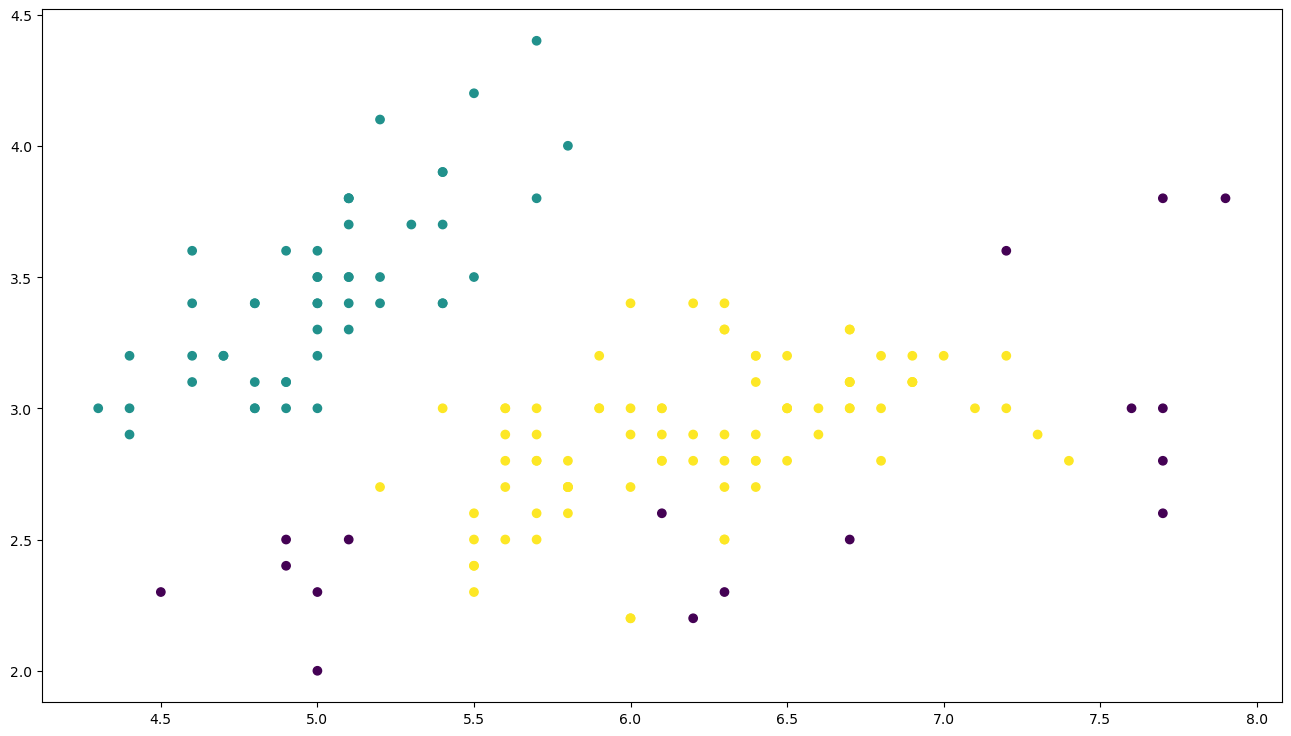

DBSCAN:  0.48603419703456924


In [48]:
plt.scatter(X.iloc[:,0], X.iloc[:,1],c = YPredict)
plt.show()
print("DBSCAN: ", silhouette_score(X, YPredict))

Y Predict :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


c:\Anaconda3\envs\deep_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


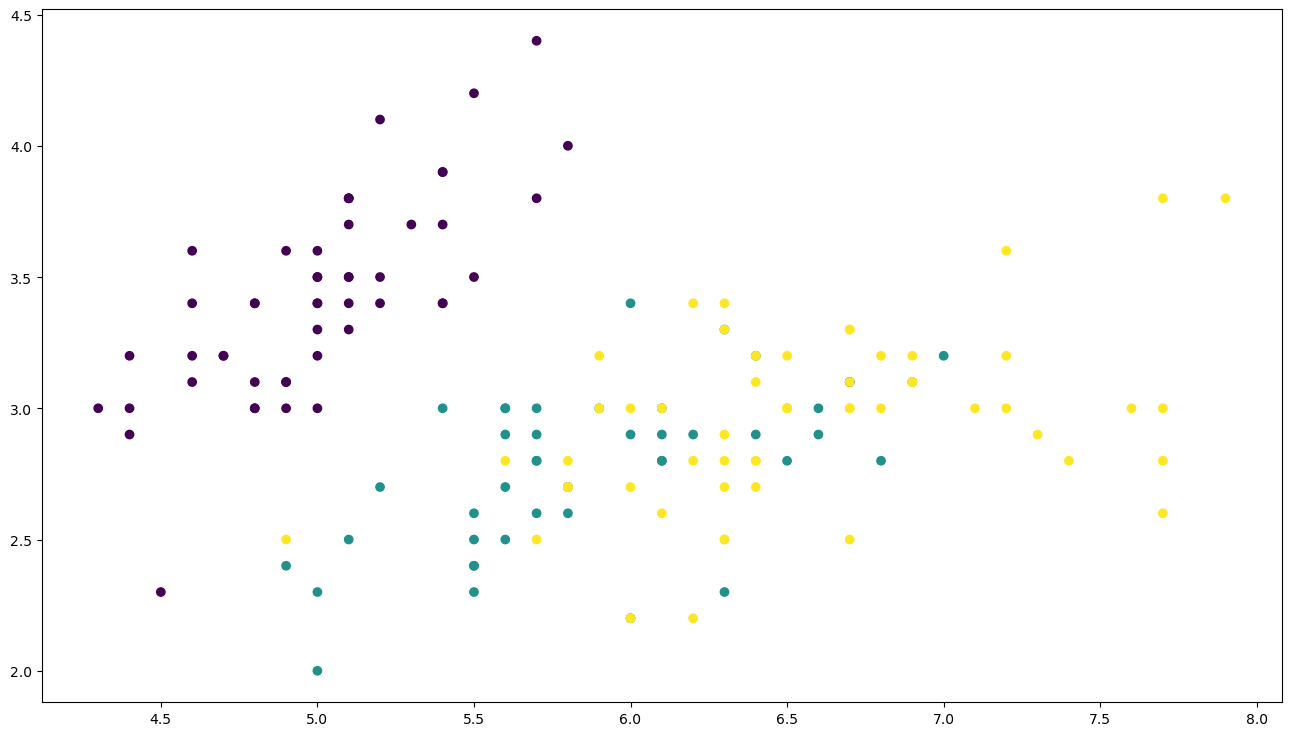

GMM:  0.5011761635067211


In [49]:
GMM = GaussianMixture(n_components=3).fit(X)
YPredict = GMM.predict(X)
print("Y Predict : ", YPredict)

plt.scatter(X.iloc[:,0], X.iloc[:,1],c = YPredict)
plt.show()
print("GMM: ", silhouette_score(X, YPredict))